# Data Cleaning & Preprocessing

**Author:** Zehra Buse Tüfekçi  
**Date:** 26 February 2026  

## Purpose of This Notebook
This notebook focuses on cleaning the raw ride-hailing dataset and preparing it for further analysis and modeling.  
The goal is to ensure data quality, consistency, and usability before applying exploratory analysis, feature engineering, and machine learning models.

## Scope of Work
In this notebook, the following steps are performed:

- Loading the raw dataset
- Inspecting dataset structure and column information
- Handling missing values
- Removing duplicate records
- Fixing invalid or inconsistent data entries
- Basic preprocessing to make the dataset clean and reliable

**⚠️ Note:** Feature engineering steps (such as datetime-based feature extraction, scaling, encoding, or feature selection) are intentionally **not included here** and are handled in a separate notebook to maintain a clear and modular machine learning pipeline.

## Output
The output of this notebook is a cleaned dataset that can be safely used for:

- Exploratory Data Analysis (EDA)
- Feature Engineering
- Model Training and Evaluation

## Data Loading and Initial Inspection
In this section, we load the raw dataset and perform initial inspection to understand its structure, columns, and basic statistics.

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ncr_ride_bookings.csv')
df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI


In [ ]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [ ]:
df.shape

(150000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


In [ ]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


## Handling Missing Values
In this section, we handle missing values for all relevant columns in the dataset to ensure data consistency and prepare it for further analysis.

The following operations were performed:

- Missing values in the `Incomplete Rides`, `Cancelled Rides by Customer`, and `Cancelled Rides by Driver` columns were replaced with **0**.
- Missing values in the `Reason for cancelling by Customer` column were replaced with `"No_Customer_Cancellation"`.
- Missing values in the `Driver Cancellation Reason` column were replaced with `"No_Driver_Cancellation"`.
- Missing values in the `Incomplete Rides Reason` column were replaced with `"No_Incomplete_Rides"`.
- For numerical columns (`Avg VTAT`, `Avg CTAT`, `Booking Value`, `Ride Distance`, `Driver Ratings`, `Customer Rating`), missing values were filled with the **median** of the respective column.
- For categorical columns such as `Payment Method`, missing values were filled with the **mode** of the column.
- Histograms and descriptive statistics were used to inspect distributions and validate the imputations.

With these imputations, the dataset's relevant columns contain meaningful values, making it ready for subsequent processing and analysis.

In [ ]:
df['Incomplete Rides'].unique()

array([nan,  1.])

In [ ]:
df['Incomplete Rides'].isnull().sum()

np.int64(141000)

In [ ]:
df['Incomplete Rides'].fillna(0, inplace=True)

/tmp/ipython-input-1046/1416218248.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Incomplete Rides'].fillna(0, inplace=True)


In [ ]:
df['Cancelled Rides by Customer'].unique()

array([nan,  1.])

In [ ]:
df['Cancelled Rides by Customer'].isnull().sum()

np.int64(139500)

In [ ]:
df['Cancelled Rides by Customer'].fillna(0, inplace=True)

/tmp/ipython-input-1046/4285745599.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cancelled Rides by Customer'].fillna(0, inplace=True)


In [ ]:
df['Cancelled Rides by Driver'].unique()

array([nan,  1.])

In [ ]:
df['Cancelled Rides by Driver'].isnull().sum()

np.int64(123000)

In [ ]:
df['Cancelled Rides by Driver'].fillna(0, inplace=True)

/tmp/ipython-input-1046/4007300870.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cancelled Rides by Driver'].fillna(0, inplace=True)


In [ ]:
df['Reason for cancelling by Customer'].unique()

array([nan, 'Driver is not moving towards pickup location',
       'Driver asked to cancel', 'AC is not working', 'Change of plans',
       'Wrong Address'], dtype=object)

In [ ]:
df['Reason for cancelling by Customer'].isnull().sum()

np.int64(139500)

In [ ]:
df["Reason for cancelling by Customer"] = df["Reason for cancelling by Customer"].fillna("No_Customer_Cancellation")


In [ ]:
df['Avg VTAT'].isnull().sum()

np.int64(10500)

In [ ]:
df['Avg VTAT'].unique()

array([ nan,  4.9, 13.4, 13.1,  5.3,  5.1,  7.1, 12.1,  6.1,  7.7,  4.6,
       12.2, 14. ,  8.5,  5.6,  6. , 12.4, 10.3,  7. , 10.4,  7.9, 13.6,
       11.5,  3.1,  8.9,  9.2,  2. ,  5.4, 14.6,  6.7,  6.6, 10. , 11. ,
        8. , 12.8,  6.4, 11.3,  2.3,  7.8,  8.8,  9.9,  4.1, 11.2,  3. ,
        9.1,  4.3, 11.4,  6.3, 11.7, 16.6,  5.8,  4. ,  3.4, 11.1,  5.9,
        8.1,  5. , 12. ,  3.2,  9.6,  3.9,  8.4, 10.9,  5.7,  8.6,  9.5,
        2.6,  2.1, 14.4,  7.5, 10.8, 14.7,  3.5,  8.3, 11.9, 12.5, 13.3,
        9.7,  3.6,  9.4,  9. ,  2.4, 19.1,  2.9, 18.5, 16.1, 13.7,  4.5,
        6.9,  6.2,  7.2,  3.7, 11.6,  3.3,  4.7,  7.4,  9.3,  8.2, 13.5,
        4.4,  2.7,  7.3, 10.5,  6.8, 10.7, 12.3,  3.8, 10.2,  9.8,  8.7,
       14.2,  6.5, 12.9,  4.2,  5.2, 16.9,  7.6, 14.9, 11.8, 14.3, 10.1,
       12.6, 14.8, 13.2, 14.5,  4.8, 14.1,  2.5, 15. , 16.2, 12.7,  5.5,
        2.8, 19.2, 18. , 13.9, 13. , 10.6, 20. , 17.6, 15.7,  2.2, 16.5,
       15.9, 19.6, 19.9, 19.8, 16. , 16.4, 13.8, 18

In [ ]:
df["Avg VTAT"].describe()


,Avg VTAT
count,139500.000000
mean,8.456352
std,3.773564
min,2.000000
25%,5.300000
50%,8.300000
75%,11.300000
max,20.000000


<Axes: >

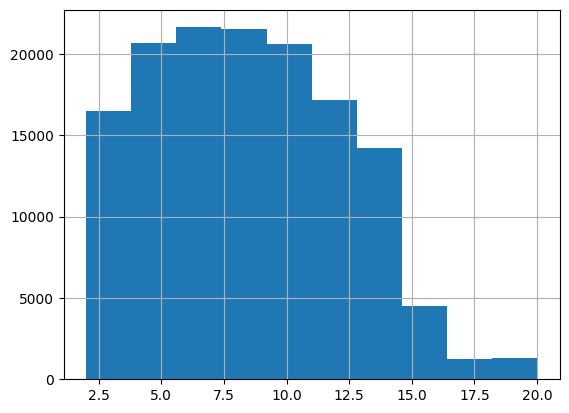

In [ ]:
df["Avg VTAT"].hist()


In [ ]:
df['Avg VTAT'].mean()

np.float64(8.456351971326164)

In [ ]:
df['Avg VTAT'].median()

8.3

In [ ]:
df['Avg VTAT'].fillna(df['Avg VTAT'].median(),inplace=True)

/tmp/ipython-input-1046/3694441623.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Avg VTAT'].fillna(df['Avg VTAT'].median(),inplace=True)


In [ ]:
df['Avg CTAT'].describe()

,Avg CTAT
count,102000.000000
mean,29.149636
std,8.902577
min,10.000000
25%,21.600000
50%,28.800000
75%,36.800000
max,45.000000


<Axes: >

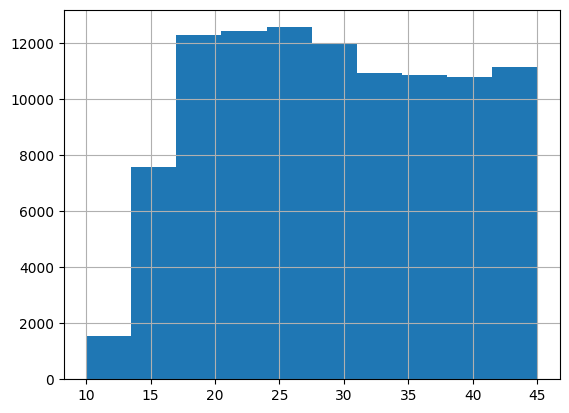

In [ ]:
df['Avg CTAT'].hist()

In [ ]:
df['Avg CTAT'].mean()

np.float64(29.149636274509803)

In [ ]:
df['Avg CTAT'].median()

28.8

In [ ]:
df['Avg CTAT'].fillna(df['Avg CTAT'].median(),inplace=True)

/tmp/ipython-input-1046/949820040.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Avg CTAT'].fillna(df['Avg CTAT'].median(),inplace=True)


In [ ]:
df['Driver Cancellation Reason'].unique()

array([nan, 'Personal & Car related issues', 'Customer related issue',
       'More than permitted people in there',
       'The customer was coughing/sick'], dtype=object)

In [ ]:
df['Driver Cancellation Reason'] = df['Driver Cancellation Reason'].fillna('No_Driver_Cancellation')

In [ ]:
df['Incomplete Rides Reason'].unique()

array([nan, 'Vehicle Breakdown', 'Other Issue', 'Customer Demand'],
      dtype=object)

In [ ]:
df['Incomplete Rides Reason'] = df['Incomplete Rides Reason'].fillna('No_Incomplete_Rides')

In [ ]:
df['Booking Value'].unique()

array([  nan,  237.,  627., ..., 3161., 2842., 3028.])

In [ ]:
df['Booking Value'].isnull().sum()

np.int64(48000)

In [ ]:
df['Booking Value'].describe()

,Booking Value
count,102000.000000
mean,508.295912
std,395.805774
min,50.000000
25%,234.000000
50%,414.000000
75%,689.000000
max,4277.000000


<Axes: >

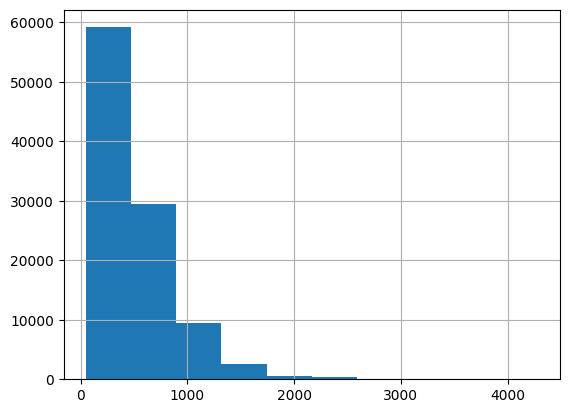

In [ ]:
df['Booking Value'].hist()

In [ ]:
df['Booking Value'].mean()

np.float64(508.29591176470586)

In [ ]:
df['Booking Value'].median()

414.0

In [ ]:
df['Booking Value'] =df['Booking Value'].fillna(df['Booking Value'].median())

In [ ]:
df['Ride Distance'].unique()

array([  nan,  5.73, 13.58, ...,  1.93,  1.19,  1.2 ])

In [ ]:
df['Ride Distance'].describe()

,Ride Distance
count,102000.000000
mean,24.637012
std,14.002138
min,1.000000
25%,12.460000
50%,23.720000
75%,36.820000
max,50.000000


<Axes: >

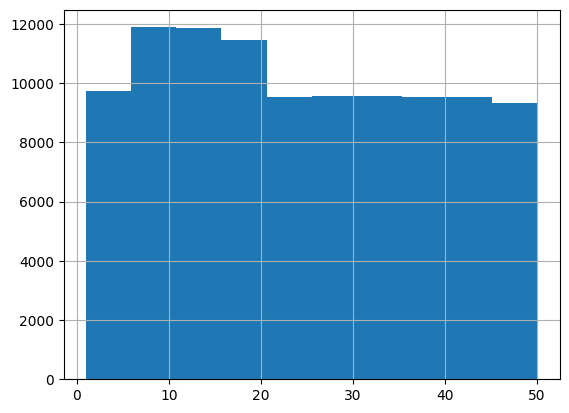

In [ ]:
df['Ride Distance'].hist()

In [ ]:
df['Ride Distance'].mean()

np.float64(24.637011666666666)

In [ ]:
df['Ride Distance'].median()

23.72

In [ ]:
df['Ride Distance'] = df['Ride Distance'].fillna(df['Ride Distance'].median())

In [ ]:
df['Driver Ratings'].unique()

array([nan, 4.9, 4.6, 4.1, 4. , 4.4, 4.2, 4.7, 3.8, 5. , 3.7, 3.1, 4.5,
       3.9, 4.3, 3.3, 3.2, 4.8, 3.6, 3.5, 3.4, 3. ])

In [ ]:
df['Driver Ratings'].describe()

,Driver Ratings
count,93000.000000
mean,4.230992
std,0.436871
min,3.000000
25%,4.100000
50%,4.300000
75%,4.600000
max,5.000000


<Axes: >

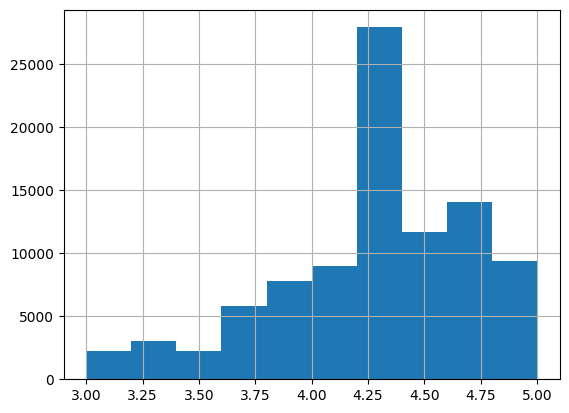

In [ ]:
df['Driver Ratings'].hist()

In [ ]:
df['Driver Ratings'].mean()

np.float64(4.230992473118278)

In [ ]:
df['Driver Ratings'].median()

4.3

In [ ]:
df['Driver Ratings'] = df['Driver Ratings'].fillna(df['Driver Ratings'].median())

In [ ]:
df['Customer Rating'].unique()

array([nan, 4.9, 5. , 4.3, 4.6, 4.1, 4.2, 4.7, 4.4, 3.6, 4.5, 3.3, 3.8,
       3.7, 4.8, 3.9, 3.4, 3.2, 3.1, 4. , 3. , 3.5])

In [ ]:
df['Customer Rating'].describe()

,Customer Rating
count,93000.000000
mean,4.404584
std,0.437819
min,3.000000
25%,4.200000
50%,4.500000
75%,4.800000
max,5.000000


<Axes: >

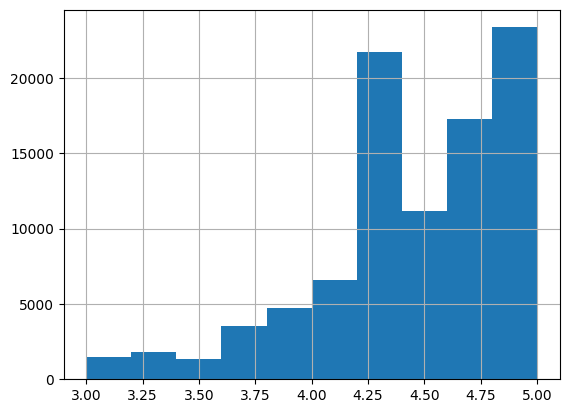

In [ ]:
df['Customer Rating'].hist()

In [ ]:
df['Customer Rating'] = df['Customer Rating'].fillna(df['Customer Rating'].median())

In [ ]:
df['Payment Method'].unique()

array([nan, 'UPI', 'Debit Card', 'Cash', 'Uber Wallet', 'Credit Card'],
      dtype=object)

In [ ]:
df['Payment Method'] = df['Payment Method'].fillna(df['Payment Method'].mode()[0])

## Saving and Downloading the Cleaned Dataset

After completing data cleaning and handling missing values, we save the cleaned dataset to a CSV file.  
This allows us to use the cleaned dataset for further analysis, feature engineering, and modeling.

The dataset is saved as `ride_cancellation_cleaned.csv` and can be downloaded directly from Colab.

In [ ]:
df.to_csv("ride_cancellation_cleaned.csv", index=False)

In [ ]:
from google.colab import files
files.download("ride_cancellation_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>